In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'
COLOR6 = '#2c7fb8'
COLOR7 = '#d95f0e'
COLOR8 = '#31a354'
COLOR9 = '#fdae6b'
COLOR10 = '#f03b20'

# Green shades
COLOR11 = '#edf8e9'
COLOR12 = '#bae4b3'
COLOR13 = '#74c476'
COLOR14 = '#31a354'
COLOR15 = '#006d2c'

# Blue shades
COLOR16 = '#eff3ff'
COLOR17 = '#bdd7e7'
COLOR18 = '#6baed6'
COLOR19 = '#3182bd'
COLOR20 = '#08519c'

# Red shades
COLOR21 = '#fee5d9'
COLOR22 = '#fcae91'
COLOR23 = '#fb6a4a'
COLOR24 = '#de2d26'
COLOR25 = '#a50f15'

In [3]:
# seaborn settings
sns.set_palette('deep', desat=0.6)
sns.set_context(rc={"figure.figsize": (8,4)})
sns.set_style("whitegrid")

In [4]:
# import data (PP-2016) into pandas
pp2016 = pd.read_csv('C:/MyBriefCase/SpringBoard/CapstoneProject/UK Property Price/pp-2016.csv', index_col = None)
# Replace NaN with Blank
pp2016 = pp2016.fillna('')
#pd.to_datetime(pp2016['Date Of Transfer'])

# Drop GUID column [Transaction Unique Identifier]
pp2016 = pp2016.drop('Transaction Unique Identifier', axis = 1)
pp2016.head(5)

,Sale Price,Date Of Transfer,Postcode,Property Type,Is New,Duration,PAON,SAON,Street,Locality,Town,District,County,PPD Category Type,Record Status
0,68000,5/20/2016 0:00,BB5 0HJ,T,N,F,75,,LONSDALE STREET,,ACCRINGTON,HYNDBURN,LANCASHIRE,A,A
1,212000,6/9/2016 0:00,BB5 3AN,D,N,L,6,,LARCH ROAD,OSWALDTWISTLE,ACCRINGTON,HYNDBURN,LANCASHIRE,A,A
2,105000,6/21/2016 0:00,LA3 2TP,T,N,F,6,,HEATHFOOT AVENUE,HEYSHAM,MORECAMBE,LANCASTER,LANCASHIRE,A,A
3,125000,6/6/2016 0:00,BB4 4EF,S,N,L,102,,RYDAL ROAD,HASLINGDEN,ROSSENDALE,ROSSENDALE,LANCASHIRE,A,A
4,176000,6/10/2016 0:00,BB6 7HJ,S,N,F,15,,BOSTONS,GREAT HARWOOD,BLACKBURN,HYNDBURN,LANCASHIRE,A,A


In [5]:
# import data (PP-2015) into pandas
pp2015 = pd.read_csv('C:/MyBriefCase/SpringBoard/CapstoneProject/UK Property Price/pp-2015.csv', index_col = None)
# Replace NaN with Blank
pp2015 = pp2015.fillna('')

# Drop GUID column [Transfer Unique Identifier]
pp2015 = pp2015.drop('Transaction Unique Identifier', axis = 1)
pp2015.head(5)

,Sale Price,Date Of Transfer,Postcode,Property Type,Is New,Duration,PAON,SAON,Street,Locality,Town,District,County,PPD Category Type,Record Status
0,231950,3/27/2015 0:00,CF11 9EE,S,N,F,43,,WYNDHAM CRESCENT,,CARDIFF,CARDIFF,CARDIFF,A,A
1,800000,1/13/2015 0:00,ME19 6FW,D,Y,F,3,,MELLINGES CLOSE,,WEST MALLING,TONBRIDGE AND MALLING,KENT,A,A
2,100000,2/6/2015 0:00,WA11 0HW,D,N,L,18,,WYEDALE ROAD,HAYDOCK,ST HELENS,ST HELENS,MERSEYSIDE,A,A
3,460000,2/27/2015 0:00,CO5 8PL,D,N,F,4,,LEA SIDE,WEST MERSEA,COLCHESTER,COLCHESTER,ESSEX,A,A
4,190000,3/27/2015 0:00,LA13 0GP,S,Y,F,20,,FARNHAM CLOSE,,BARROW-IN-FURNESS,BARROW-IN-FURNESS,CUMBRIA,A,A


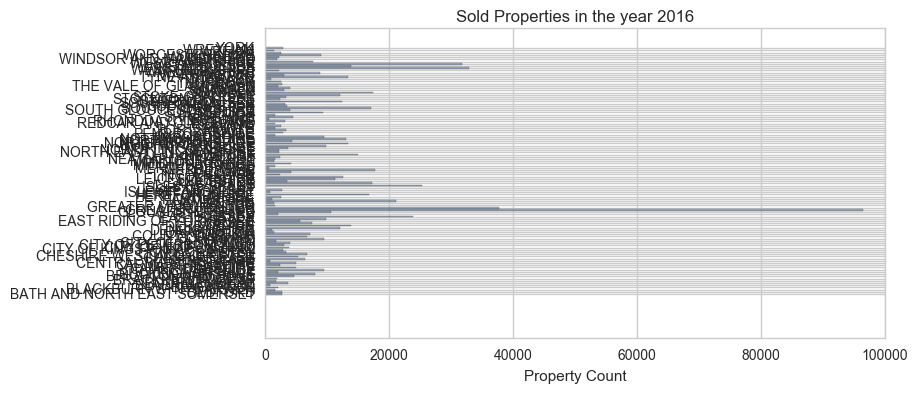

In [6]:
#Number of Properties sold across County depicted in BAR-Chart
propCount = pp2016.groupby(['County']).size()
countyName = np.sort(pp2016['County'].unique())

#Construct BAR-Chart
y_pos = np.arange(len(countyName))

plt.barh(bottom=y_pos, width=propCount, align='center', alpha=0.5)
plt.yticks(y_pos, countyName)
plt.xlabel('Property Count')
plt.title('Sold Properties in the year 2016')
plt.figure(figsize=(10,100))
plt.show()

In [7]:
#Constructing 2-dimensioanl array of CountyName and PropertyCount
propCount = pp2016.groupby(['County']).size()
countyName = np.sort(pp2016['County'].unique())

countyProp = []
for index in range(len(countyName)):
    countyProp.append([countyName[index], propCount[index]])

#Form Dataframe
countyPropDF = pd.DataFrame(data = countyProp, columns = ['County Name', 'Property Count']) 
countyPropDF

,County Name,Property Count
0,BATH AND NORTH EAST SOMERSET,2778
1,BEDFORD,2729
2,BLACKBURN WITH DARWEN,1603
3,BLACKPOOL,2073
4,BLAENAU GWENT,713
5,BOURNEMOUTH,3704
6,BRACKNELL FOREST,1807
7,BRIDGEND,1945
8,BRIGHTON AND HOVE,4670
9,BUCKINGHAMSHIRE,8105


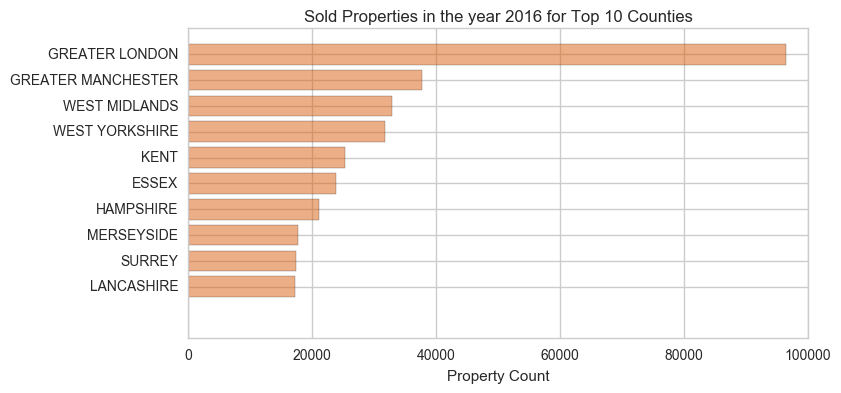

In [8]:
#Number of Properties sold across County depicted in BAR-Chart [Top 10 by numbers]
countyPropDF = countyPropDF.sort_values(['Property Count'])

countyPropTop = countyPropDF.tail(10)

#Construct BAR-Chart
y_pos = np.arange(len(countyPropTop['County Name']))
plt.barh(y_pos, countyPropTop['Property Count'], align='center', alpha=0.5, color = COLOR7)
plt.yticks(y_pos, countyPropTop['County Name'])
plt.xlabel('Property Count')
plt.title('Sold Properties in the year 2016 for Top 10 Counties')
plt.show()


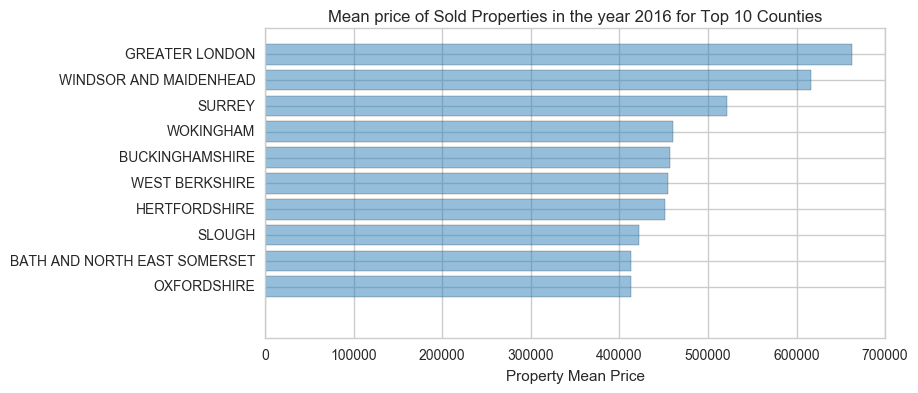

In [9]:
#Mean price Properties sold across County depicted in BAR-Chart [Top 10 by numbers]
ppMean = pp2016.groupby(['County'])['Sale Price'].mean().sort_values().reset_index() 
ppMeanTop = ppMean.tail(10)
#Construct BAR-Chart 
y_pos = np.arange(len(ppMeanTop['County'])) 
plt.barh(y_pos, ppMeanTop['Sale Price'], align='center', alpha=0.5, color = COLOR6) 
plt.yticks(y_pos, ppMeanTop['County']) 
plt.xlabel('Property Mean Price') 
plt.title('Mean price of Sold Properties in the year 2016 for Top 10 Counties') 
plt.show()

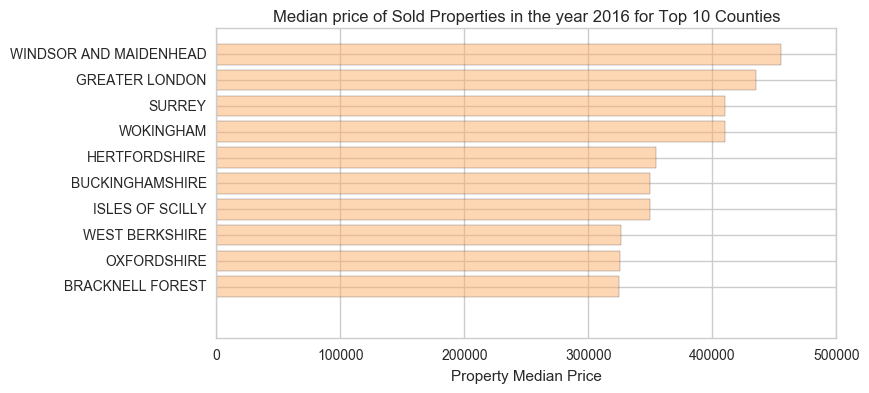

In [10]:
#Median price Properties sold across County depicted in BAR-Chart [Top 10 by numbers]
ppMedian = pp2016.groupby(['County'])['Sale Price'].median().sort_values().reset_index() 
ppMedianTop = ppMedian.tail(10)

#Construct BAR-Chart 
y_pos = np.arange(len(ppMedianTop['County'])) 
plt.barh(y_pos, ppMedianTop['Sale Price'], align='center', alpha=0.5, color = COLOR9) 
plt.yticks(y_pos, ppMedianTop['County']) 
plt.xlabel('Property Median Price') 
plt.title('Median price of Sold Properties in the year 2016 for Top 10 Counties') 
plt.show()

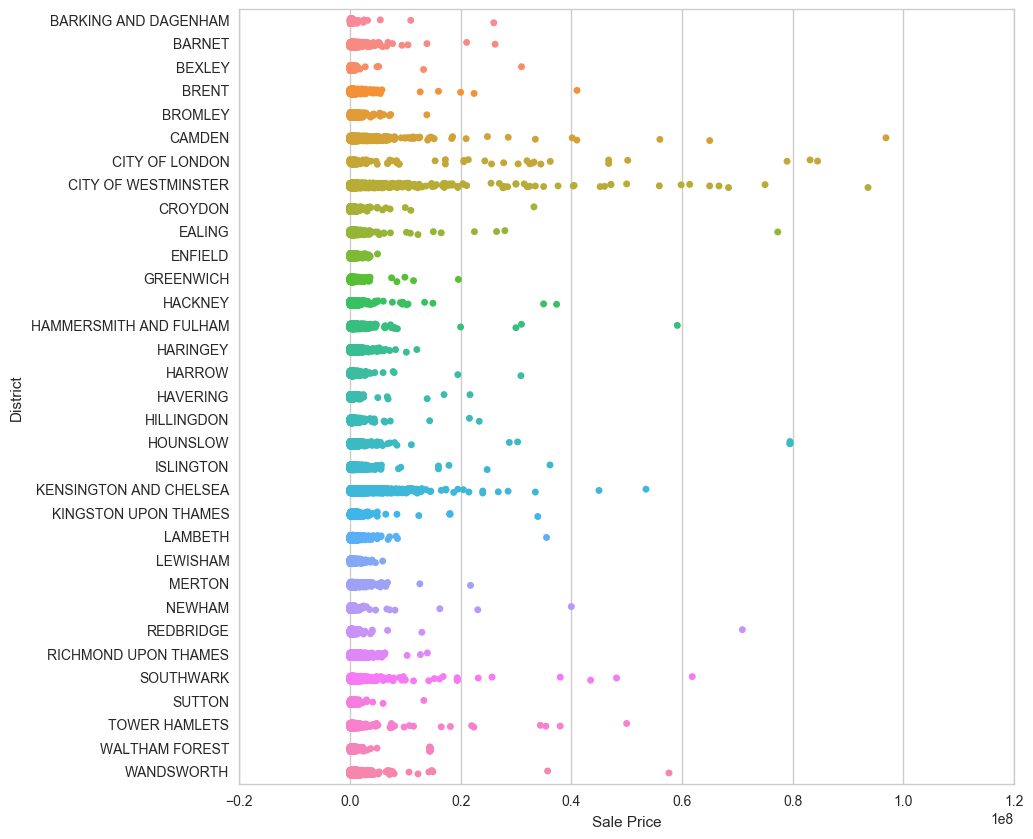

In [11]:
# Distribution of properties in terms of Sale Price across District in a County
ppCountyProp = pp2016[pp2016['County'] == 'GREATER LONDON']
ppCountyProp = ppCountyProp.sort_values(['District'])

plt.figure(figsize=(10,10))
# Draw a categorical scatterplot to show each observation
sns.stripplot(y="District", x="Sale Price", data=ppCountyProp, jitter = True)


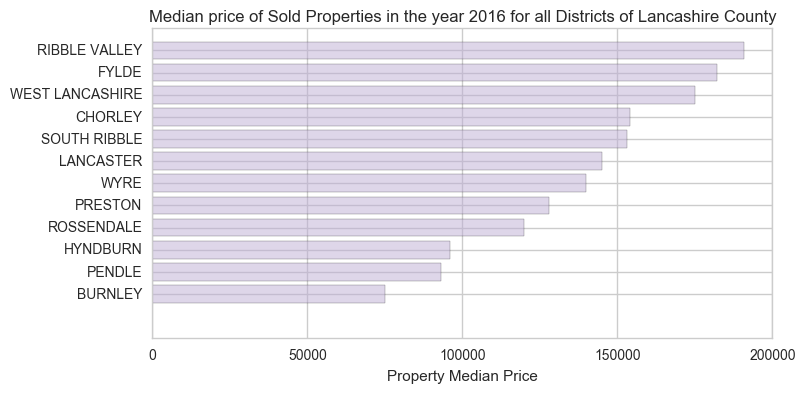

In [12]:
#Median price of Properties sold across all districts of 'LANCASHIRE' county depicted in BAR-Chart 
ppCountyProp = pp2016[pp2016['County'] == 'LANCASHIRE']
ppMedianDistrict = ppCountyProp.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 

#Construct BAR-Chart 
y_pos = np.arange(len(ppMedianDistrict['District'])) 
plt.barh(y_pos, ppMedianDistrict['Sale Price'], align='center', alpha=0.5, color = COLOR2) 
plt.yticks(y_pos, ppMedianDistrict['District']) 
plt.xlabel('Property Median Price') 
plt.title('Median price of Sold Properties in the year 2016 for all Districts of Lancashire County') 
plt.show()

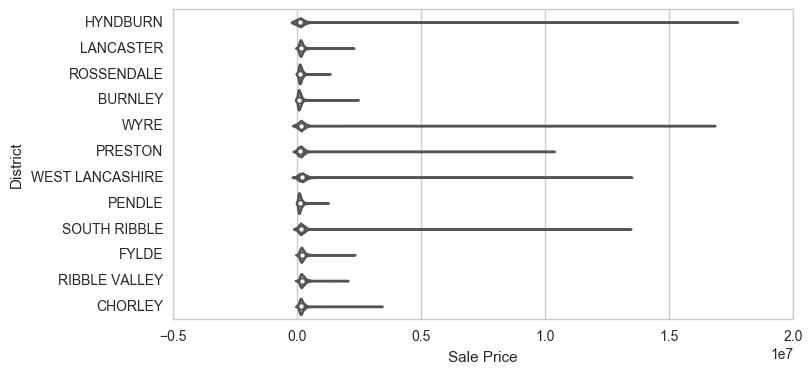

In [13]:
#This Violin Plot depicts distribution of Property Sale Price across Districts of 'LANCASHIRE' county 
ppCountyProp = pp2016[pp2016['County'] == 'LANCASHIRE']

sns.violinplot(x=ppCountyProp['Sale Price'], y=ppCountyProp['District'], palette="muted")

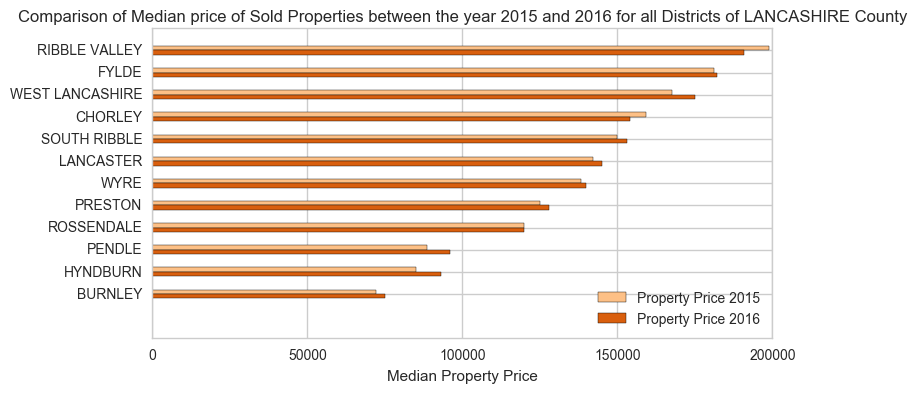

In [14]:
#Change in Median Property Price for 'LANCASHIRE' County. Year to be considered Sale Price of 2015 and 2016
ppCountyProp2015 = pp2015[pp2015['County'] == 'LANCASHIRE']
ppCountyProp2016 = pp2016[pp2016['County'] == 'LANCASHIRE']

ppMedianDist2015 = ppCountyProp2015.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 
ppMedianDist2016 = ppCountyProp2016.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 

# Set the bar width
bar_width = 0.1
# Set the bar spacing
bar_space = 0.1
# Set the bar height
bar_height = 0.2

y_pos = np.arange(len(ppMedianDist2015['District']))
#Construct the Multiple Bars
plt.barh(bottom=y_pos+bar_space, width=ppMedianDist2015['Sale Price'], height = bar_height, left=None, color=COLOR3, align='center', label='Property Price 2015')
plt.barh(bottom=y_pos-bar_space, width=ppMedianDist2016['Sale Price'], height = bar_height, left=None, color=COLOR7, align='center', label='Property Price 2016')
plt.yticks(y_pos, ppMedianDist2015['District']) 
plt.xlabel('Median Property Price') 
plt.title('Comparison of Median price of Sold Properties between the year 2015 and 2016 for all Districts of LANCASHIRE County') 
plt.legend(loc='lower right')
plt.show()


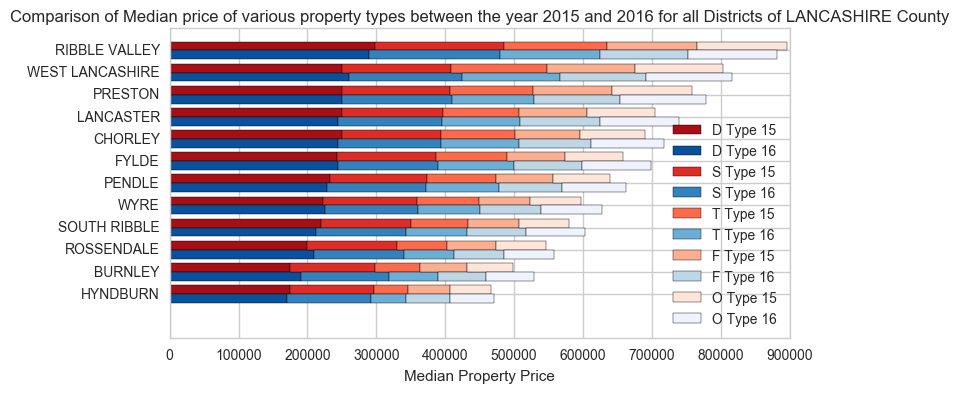

In [15]:
#Change in Median Property Price of various property types for 'LANCASHIRE' County. Year to be considered Sale Price of 2015 and 2016
ppCountyProp2015 = pp2015[pp2015['County'] == 'LANCASHIRE']
ppCountyProp2016 = pp2016[pp2016['County'] == 'LANCASHIRE']

#D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other 
ppCountyDProp2015 = ppCountyProp2015[ppCountyProp2015['Property Type'] == 'D']
ppCountyDProp2016 = ppCountyProp2016[ppCountyProp2016['Property Type'] == 'D']

ppCountySProp2015 = ppCountyProp2015[ppCountyProp2015['Property Type'] == 'S']
ppCountySProp2016 = ppCountyProp2016[ppCountyProp2016['Property Type'] == 'S']

ppCountyTProp2015 = ppCountyProp2015[ppCountyProp2015['Property Type'] == 'T']
ppCountyTProp2016 = ppCountyProp2016[ppCountyProp2016['Property Type'] == 'T']

ppCountyFProp2015 = ppCountyProp2015[ppCountyProp2015['Property Type'] == 'F']
ppCountyFProp2016 = ppCountyProp2016[ppCountyProp2016['Property Type'] == 'F']

ppCountyOProp2015 = ppCountyProp2015[ppCountyProp2015['Property Type'] == 'O']
ppCountyOProp2016 = ppCountyProp2016[ppCountyProp2016['Property Type'] == 'O']

#Determining Median price of various property types across all districts
ppMedDPropDst2015 = ppCountyDProp2015.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 
ppMedDPropDst2016 = ppCountyDProp2016.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 

ppMedSPropDst2015 = ppCountySProp2015.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 
ppMedSPropDst2016 = ppCountySProp2016.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 

ppMedTPropDst2015 = ppCountyTProp2015.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 
ppMedTPropDst2016 = ppCountyTProp2016.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 

ppMedFPropDst2015 = ppCountyFProp2015.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 
ppMedFPropDst2016 = ppCountyFProp2016.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 

ppMedOPropDst2015 = ppCountyOProp2015.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 
ppMedOPropDst2016 = ppCountyOProp2016.groupby(['District'])['Sale Price'].median().sort_values().reset_index() 

# Set the bar width
bar_width = 0.1
# Set the bar spacing
bar_space = 0.2
# Set the bar height
bar_height = 0.4

# Left of Stacked Bar
leftS2015 = ppMedDPropDst2015['Sale Price']
leftS2016 = ppMedDPropDst2016['Sale Price']

leftT2015 = leftS2015 + ppMedSPropDst2015['Sale Price']
leftT2016 = leftS2016 + ppMedSPropDst2016['Sale Price']

leftF2015 = leftT2015 + ppMedTPropDst2015['Sale Price']
leftF2016 = leftT2016 + ppMedTPropDst2016['Sale Price']

leftO2015 = leftF2015 + ppMedFPropDst2015['Sale Price']
leftO2016 = leftF2016 + ppMedFPropDst2016['Sale Price']

y_pos = np.arange(len(ppMedDPropDst2015['District']))
#Construct the Multiple Bars-bar_width
plt.barh(bottom=y_pos+bar_space, width=ppMedDPropDst2015['Sale Price'], height = bar_height, left=None, color=COLOR25, align='center', label='D Type ''15')
plt.barh(bottom=y_pos-bar_space, width=ppMedDPropDst2016['Sale Price'], height = bar_height, left=None, color=COLOR20, align='center', label='D Type ''16')

plt.barh(bottom=y_pos+bar_space, width=ppMedSPropDst2015['Sale Price'], height = bar_height, left=leftS2015, color=COLOR24, align='center', label='S Type ''15')
plt.barh(bottom=y_pos-bar_space, width=ppMedSPropDst2016['Sale Price'], height = bar_height, left=leftS2016, color=COLOR19, align='center', label='S Type ''16')

plt.barh(bottom=y_pos+bar_space, width=ppMedTPropDst2015['Sale Price'], height = bar_height, left=leftT2015, color=COLOR23, align='center', label='T Type ''15')
plt.barh(bottom=y_pos-bar_space, width=ppMedTPropDst2016['Sale Price'], height = bar_height, left=leftT2016, color=COLOR18, align='center', label='T Type ''16')

plt.barh(bottom=y_pos+bar_space, width=ppMedFPropDst2015['Sale Price'], height = bar_height, left=leftF2015, color=COLOR22, align='center', label='F Type ''15')
plt.barh(bottom=y_pos-bar_space, width=ppMedFPropDst2016['Sale Price'], height = bar_height, left=leftF2016, color=COLOR17, align='center', label='F Type ''16')

plt.barh(bottom=y_pos+bar_space, width=ppMedFPropDst2015['Sale Price'], height = bar_height, left=leftO2015, color=COLOR21, align='center', label='O Type ''15')
plt.barh(bottom=y_pos-bar_space, width=ppMedFPropDst2016['Sale Price'], height = bar_height, left=leftO2016, color=COLOR16, align='center', label='O Type ''16')


plt.yticks(y_pos, ppMedDPropDst2015['District']) 
plt.xlabel('Median Property Price') 
plt.title('Comparison of Median price of various property types between the year 2015 and 2016 for all Districts of LANCASHIRE County') 
plt.legend(loc='best')
plt.show()